### Ensemble - Random Forest (Bagging)
1. bagging - creating multiple models with different structures randomly and generate output

In [68]:
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1 : Read the dataset

In [69]:
import pandas as pd

df = pd.read_csv('train_titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### step 2 : Perform Basic data quality checks

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [71]:
m = df.isna().sum()
m[m>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [72]:
df.duplicated().sum()

np.int64(0)

### Step 3: Seperate X and Y (Survived)
1. Drop Passenger Id, Name, Ticket Number as these are satistically insignificant
2. Drop cabin column because it has too many missing values

In [73]:
X = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'])
Y = df[['Survived']]

In [74]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [75]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [76]:
Y.value_counts()

Survived
0           549
1           342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

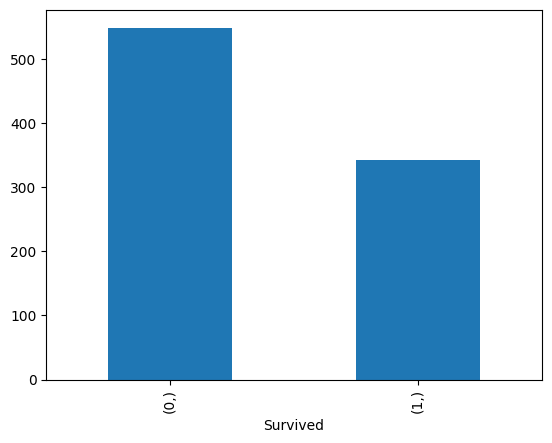

In [77]:
Y.value_counts().plot(kind='bar')

### Step 4 : Perform preprocessing on X

In [78]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [79]:
cat

['Sex', 'Embarked']

In [80]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [82]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])

In [84]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')), ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]).set_output(transform='pandas')

In [85]:
pre = ColumnTransformer([('num', num_pipe, con), ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [86]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


### Step 5: Apply train test split

In [87]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [88]:
xtrain.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
331,-1.566107,1.240235,-0.474545,-0.473674,-0.074583,0.0,1.0,0.0,0.0,1.0
733,-0.369365,-0.488887,-0.474545,-0.473674,-0.386671,0.0,1.0,0.0,0.0,1.0
382,0.827377,0.202762,-0.474545,-0.473674,-0.488854,0.0,1.0,0.0,0.0,1.0
704,0.827377,-0.258337,0.432793,-0.473674,-0.490280,0.0,1.0,0.0,0.0,1.0
813,0.827377,-1.795334,3.154809,2.008933,-0.018709,1.0,0.0,0.0,0.0,1.0


In [89]:
xtest.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
709,0.827377,-0.104637,0.432793,0.767630,-0.341452,0.0,1.0,1.0,0.0,0.0
439,-0.369365,0.125912,-0.474545,-0.473674,-0.437007,0.0,1.0,0.0,0.0,1.0
840,0.827377,-0.719436,-0.474545,-0.473674,-0.488854,0.0,1.0,0.0,0.0,1.0
720,-0.369365,-1.795334,-0.474545,0.767630,0.016023,1.0,0.0,0.0,0.0,1.0
39,0.827377,-1.180535,0.432793,-0.473674,-0.422074,1.0,0.0,1.0,0.0,0.0


In [90]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [91]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


In [92]:
xtrain.shape

(712, 10)

In [93]:
xtest.shape

(179, 10)

### Step 6 : Build the model

In [94]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=1, criterion='gini', max_depth=1, min_samples_split=5, min_samples_leaf=5)
model1.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=1, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=1)

In [95]:
model1.score(xtrain, ytrain)

0.7879213483146067

In [96]:
model1.score(xtest, ytest)

0.7821229050279329

### Tune the model with hyperparameter 

In [97]:
params1 = {'n_estimators': [10, 50, 100, 200],
           'max_depth': [1, 2, 3, 4, 5, 6, 7],
           'min_samples_split': [5, 6, 7, 8, 9, 10]}

In [98]:
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier()
rscv1 = RandomizedSearchCV(rfc, param_distributions=params1, cv=5, scoring='f1_macro')
rscv1.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7],
                                        'min_samples_split': [5, 6, 7, 8, 9,
                                                              10],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1_macro')

In [99]:
rscv1.best_params_

{'n_estimators': 50, 'min_samples_split': 8, 'max_depth': 7}

In [100]:
rscv1.best_score_

np.float64(0.8028052623941037)

In [101]:
best_rfc = rscv1.best_estimator_
best_rfc

RandomForestClassifier(max_depth=7, min_samples_split=8, n_estimators=50)

### Evaluate the model

In [102]:
best_rfc.score(xtrain, ytrain)

0.8778089887640449

In [103]:
best_rfc.score(xtest, ytest)

0.8156424581005587

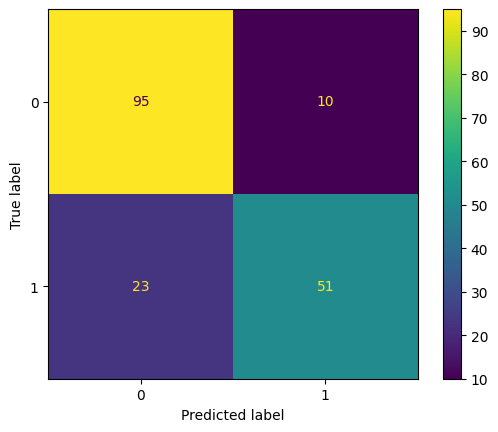

In [104]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_rfc, xtest, ytest)

In [105]:
ypred_train = best_rfc.predict(xtrain)
ypred_test = best_rfc.predict(xtest)

In [106]:
ypred_train[0:5]

array([0, 0, 0, 0, 0])

In [107]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [108]:
ypred_test[0:5]

array([0, 0, 0, 1, 1])

In [109]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


In [110]:
from sklearn.metrics import classification_report
print(classification_report( ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



### Gradient Boosting Model

In [111]:
from sklearn.ensemble import GradientBoostingClassifier
model2 = GradientBoostingClassifier(learning_rate=0.5, n_estimators=1, max_depth=1, min_samples_split=5, min_samples_leaf=5)
model2.fit(xtrain, ytrain)

GradientBoostingClassifier(learning_rate=0.5, max_depth=1, min_samples_leaf=5,
                           min_samples_split=5, n_estimators=1)

In [112]:
model2.score(xtrain, ytrain)

0.7879213483146067

In [113]:
model2.score(xtest, ytest)

0.7821229050279329

### Hyperparameter Tuning

In [114]:
params2 = {'n_estimators': [10, 50, 100, 200, 300],
           'learning_rate': [0.01, 0.05, 0.1, 0.2],
           'max_depth':[2, 3, 4, 5, 6, 7]}

In [115]:
gbc = GradientBoostingClassifier()
rscv2 = RandomizedSearchCV(gbc, param_distributions=params2, cv=5, scoring='f1_macro')
rscv2.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'n_estimators': [10, 50, 100, 200,
                                                         300]},
                   scoring='f1_macro')

In [116]:
rscv2.best_params_

{'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1}

In [117]:
rscv2.best_score_

np.float64(0.8206290254274548)

In [118]:
best_gbc = rscv2.best_estimator_
best_gbc

GradientBoostingClassifier(max_depth=4)

### Evaluate gradient bossting model

In [119]:

best_gbc.score(xtrain, ytrain)

0.9339887640449438

In [120]:
best_gbc.score(xtest, ytest)

0.8324022346368715

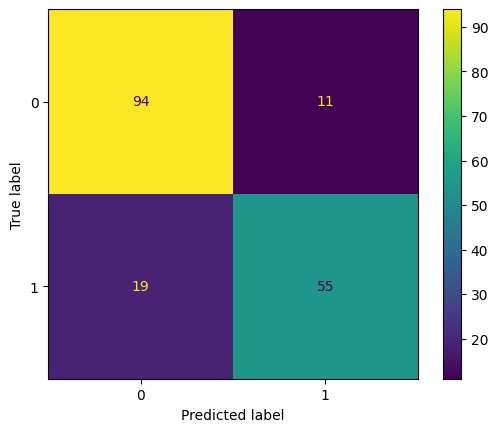

In [121]:
ConfusionMatrixDisplay.from_estimator(best_gbc, xtest, ytest)

In [122]:
ypred_train2 = best_gbc.predict(xtrain)
ypred_test2 = best_gbc.predict(xtest)

In [123]:
ypred_train2[0:5]

array([0, 0, 0, 0, 0])

In [124]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


In [125]:
print(classification_report(ytest, ypred_test2))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       105
           1       0.83      0.74      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



### Gradient boosting model is slightly better in this case and accuracy is more than 80% in test

### Choosing gradient boosting model for final out of sample predictions

### plot the feature importance

In [126]:
best_gbc.feature_importances_

array([0.142033  , 0.14666844, 0.05918455, 0.01354675, 0.21246829,
       0.12545351, 0.28262338, 0.00457197, 0.0033841 , 0.010066  ])

In [127]:
xtrain.columns

Index(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex_female', 'cat__Sex_male', 'cat__Embarked_C',
       'cat__Embarked_Q', 'cat__Embarked_S'],
      dtype='object')

In [128]:
imp = pd.Series(best_gbc.feature_importances_, index=xtrain.columns)

In [129]:
imp

num__Pclass        0.142033
num__Age           0.146668
num__SibSp         0.059185
num__Parch         0.013547
num__Fare          0.212468
cat__Sex_female    0.125454
cat__Sex_male      0.282623
cat__Embarked_C    0.004572
cat__Embarked_Q    0.003384
cat__Embarked_S    0.010066
dtype: float64

<Axes: >

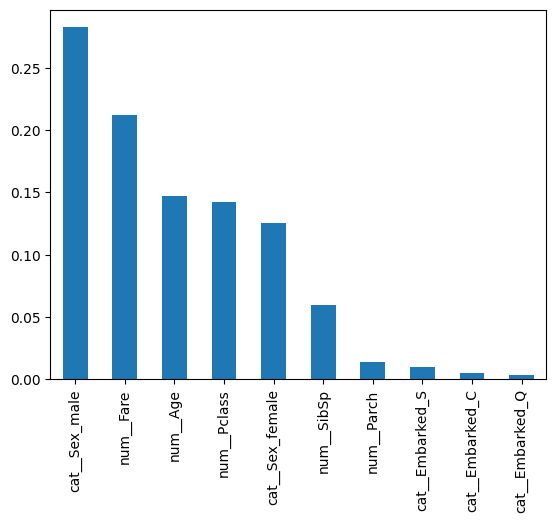

In [130]:
imp.sort_values(ascending=False).plot(kind='bar')

### Predict out of sample predictions 

In [131]:
xnew = pd.read_csv('test_titanic.csv')
xnew

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [132]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'Embarked'])])

In [134]:
xnew_pre = pre.fit_transform(xnew)
xnew_pre

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.873482,0.386231,-0.499470,-0.400248,-0.497413,0.0,1.0,0.0,1.0,0.0
1,0.873482,1.371370,0.616992,-0.400248,-0.512278,1.0,0.0,0.0,0.0,1.0
2,-0.315819,2.553537,-0.499470,-0.400248,-0.464100,0.0,1.0,0.0,1.0,0.0
3,0.873482,-0.204852,-0.499470,-0.400248,-0.482475,0.0,1.0,0.0,0.0,1.0
4,0.873482,-0.598908,0.616992,0.619896,-0.417492,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
413,0.873482,-0.204852,-0.499470,-0.400248,-0.493455,0.0,1.0,0.0,0.0,1.0
414,-1.505120,0.740881,-0.499470,-0.400248,1.314435,1.0,0.0,1.0,0.0,0.0
415,0.873482,0.701476,-0.499470,-0.400248,-0.507796,0.0,1.0,0.0,0.0,1.0
416,0.873482,-0.204852,-0.499470,-0.400248,-0.493455,0.0,1.0,0.0,0.0,1.0


In [135]:
preds = best_gbc.predict(xnew_pre)
preds

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,

In [136]:
best_gbc.classes_

array([0, 1])

In [137]:
probs = best_gbc.predict_proba(xnew_pre)
probs

array([[0.96351769, 0.03648231],
       [0.96449988, 0.03550012],
       [0.62468205, 0.37531795],
       [0.72865237, 0.27134763],
       [0.65571079, 0.34428921],
       [0.88266191, 0.11733809],
       [0.29025804, 0.70974196],
       [0.84227891, 0.15772109],
       [0.46782425, 0.53217575],
       [0.7788902 , 0.2211098 ],
       [0.52082238, 0.47917762],
       [0.89432443, 0.10567557],
       [0.0520007 , 0.9479993 ],
       [0.95369596, 0.04630404],
       [0.0316502 , 0.9683498 ],
       [0.0429564 , 0.9570436 ],
       [0.8971955 , 0.1028045 ],
       [0.89195917, 0.10804083],
       [0.10961529, 0.89038471],
       [0.93032258, 0.06967742],
       [0.38921961, 0.61078039],
       [0.50919604, 0.49080396],
       [0.0625249 , 0.9374751 ],
       [0.38963671, 0.61036329],
       [0.01726316, 0.98273684],
       [0.93398182, 0.06601818],
       [0.01276974, 0.98723026],
       [0.89195917, 0.10804083],
       [0.67881503, 0.32118497],
       [0.63850319, 0.36149681],
       [0.

In [139]:
prob_sur = probs[:,1]
prob_sur[0:5]

array([0.03648231, 0.03550012, 0.37531795, 0.27134763, 0.34428921])

In [140]:
df_final = xnew[['PassengerId']]
df_final.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [141]:
df_final['Survived_pred'] = preds
df_final['Probability'] = prob_sur

In [142]:
df_final

,PassengerId,Survived_pred,Probability
0,892,0,0.036482
1,893,0,0.035500
2,894,0,0.375318
3,895,0,0.271348
4,896,0,0.344289
...,...,...,...
413,1305,0,0.479178
414,1306,1,0.979800
415,1307,0,0.015517
416,1308,0,0.479178


In [145]:
df_final['Survived_pred'].value_counts()

Survived_pred
0    248
1    170
Name: count, dtype: int64

<Axes: xlabel='Survived_pred'>

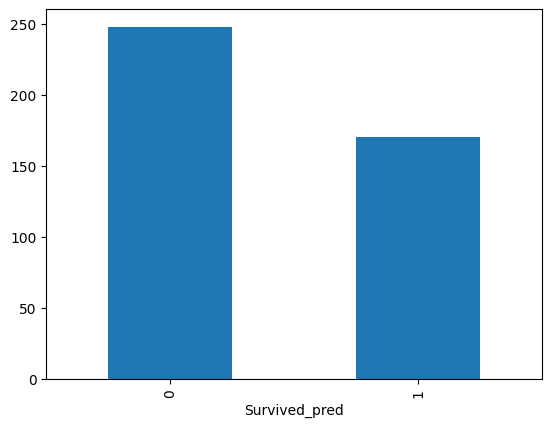

In [146]:
df_final['Survived_pred'].value_counts().plot(kind='bar')